## Ejercicios del tema de Aproximacion
---
### Ejercicio 2:  
   Tenemos que crear una funcion que dado un numero n, nos aproxime el valor de pi con un rango de 10^-n.  
   Para ello recordemos que:  
   * El valor de un lado del hexagono inscrito en una circunferencia de radio 1 es 1/2  
   * El de uno circunscrito es de 1/sqrt(3)

Sea S2n el valor de un lado del poligono regular de 2n lados inscrito en una circunferencia de radio 1 y T2n el valor para el poligono circunscrito, se cumple que:  
   >T2n = 1 / (1/Tn + 1/Sn)  
   >S2n = sqrt( T2n*Sn / 2 )

In [1]:
#Funciones:

#Dado la mitad lado del poligono de n lados circunscrito e inscrito de la circunferencia de radio 1
#devuelve el lado del poligono circunscrito de 2n lados
def circuns_2n_lado(s,t):
    return 1 / (1/t + 1/s);

#Lo mismo que la funcion anterior pero devuelve el del poligono inscrito
def insc_2n_lado(s,t):
    return sqrt( circuns_2n_lado(s,t)*s / 2 );

#aproximacion a pi
#dado un x, devuelve una tupla (x,y) tal que 2*pi pertenece al intervalo y el intervalo tiene una diferencia
#menor a 10^-n
def aprox_2pi(x):
    n=6;
    #mitad del lado del hexagono inscrito en circunferencia de 1
    s=1/2;
    #mitad del lado del hexagono circunscrito
    t=1/sqrt(3);
    #perimetro inscrito
    pins=2*s*n;
    #perimetro circunscrito
    pcir=2*t*n;
    while (pcir-pins)>(10^-x):
        s,t=insc_2n_lado(s,t),circuns_2n_lado(s,t);
        n=n*2;
        pins=2*s*n;
        pcir=2*t*n;
    return (pins.n(),pcir.n());

### Ejercicio 3:
Utilizando el polinomio de taylor de arctan(x) aproximaremos pi:
* Por un lado lo calcularemos con x=1 (y multiplicaremos por 4)
* Por otro lado calcularemos con x=(1/2) y x=(1/3), sumaremos y multiplicaremos por 4

Calcularemos la eficiencia de estos dos metodos

In [1]:
#Funciones:

#Devuelve una lista L que contiene en la posicion 0 la cantidad de sumandos para llegar a precision 10^-0,
#en 1 la precision para 10^-1,...,10^-x
#usando el primer metodo
def primero(x):
    suma=4;
    n=1;
    exp=3;
    while abs(suma - pi)>10^-x:
        if(n%2==0):
            suma = suma + 4*(1^exp)/exp;
        else:
            suma = suma - 4*(1^exp)/exp;
        exp=exp+2;
        n=n+1;
    return n;
#Lo mismo usando el segundo metodo
def segundo(x):
    a=1/2;
    b=1/3;
    suma=(a+b)*4;
    n=1;
    
    exp=3;
    while abs(suma - pi)>10^-x:
        if(n%2==0):
            a=a+((1/2)^exp)/exp;
            b=b+((1/3)^exp)/exp;
            suma = 4*(a+b);
        else:
            a=a-((1/2)^exp)/exp;
            b=b-((1/3)^exp)/exp;
            suma = 4*(a+b);
        exp=exp+2;
        n=n+1;
    return n;

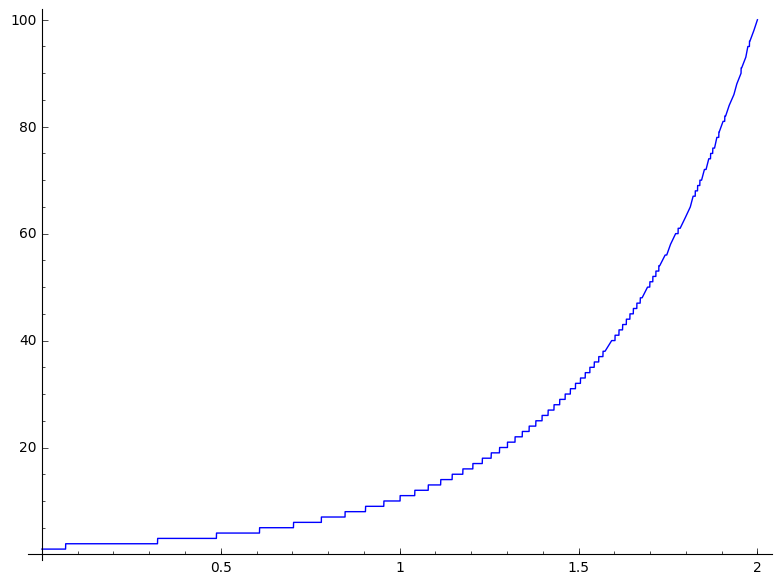

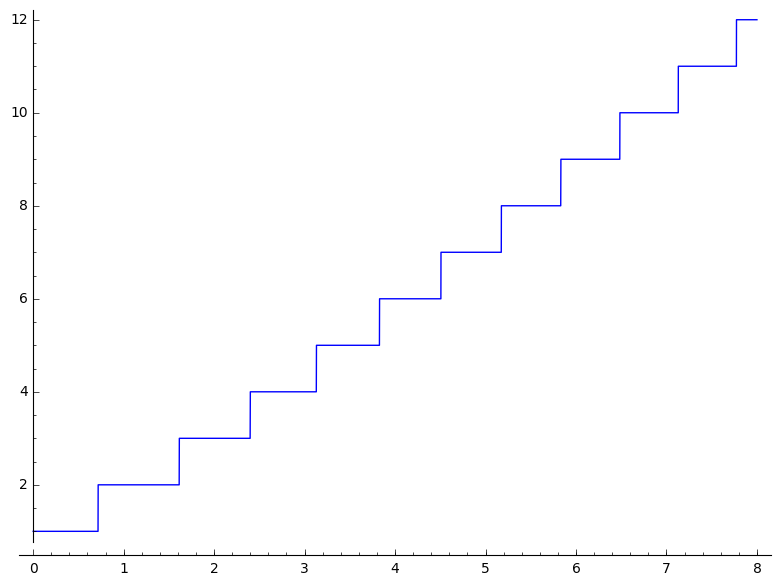

4


In [2]:
show(plot(primero,(x,0,2)));
show(plot(segundo,(x,0,8)));
print segundo(3)

Se puede probar con un par de puntos la mucha mayor eficiencia del segundo metodo de aproximacion, por muchisimo

### Ejercicio 10:
---
**1.-** Dado un numero real r y un numero k de pasos conseguir la fraccion continua [a0,a1,...,ak]

In [36]:
def cont_fract(real,k):
    L=[];
    
    #Agregamos el primer termino a0
    a=floor(real);
    L.append(a);
    aux=real;
    
    #Si es entero
    if(aux==a):
        return L
    
    #Agregamos los siguientes k terminos: a1, a2, ..., ak
    for i in srange(0,k):
        aux=1/(aux-a);
        if(aux<=1):
            L.append(aux);
            return L;
        a=floor(aux);
        #En caso de que el numero ya sea entero
        if(aux==a):
            L.append(a);
            return L;
        L.append(a);
    return L;


In [44]:
print cont_fract(pi,10);

[3, 7, 15, 1, 292, 1, 1, 1, 2, 1, 3]


**2.-** Conseguir el mismo algoritmo para racionales que devuelva la fraccion continua completa

In [47]:
def cont_fract2(n,m):
    L=[];
    
    #Agregamos el primer termino a0
    a=floor(n/m);
    L.append(a);
    aux=n/m;
    
    #Si es entero
    if(aux==a):
        return L
    
    #Agregamos los siguientes k terminos: a1, a2, ..., ak
    while true:
        aux=1/(aux-a);
        if(aux<=1):
            L.append(aux);
            return L;
        a=floor(aux);
        #En caso de que el numero ya sea entero
        if(aux==a):
            L.append(a);
            return L;
        L.append(a);
    return L;


In [50]:
print cont_fract2(157,68);

[2, 3, 4, 5]


**3.-** Funcion que tome la lista de una fraccion continua y produzca la fraccion convergente

In [56]:
#Se puede hacer de forma recursiva facilmente, sin embargo seria muy ineficiente.
#Si analizamos el bucle podemos ver que tambien obtendremos la fraccion, comenzando por el final de la lista.
def frac_conv(S):
    l=len(S);
    frac=0;
    for i in srange(0,l):
        #En caso de que lleguemos al primer elemento
        if(i==l-1):
            return frac+S[l-(i+1)];
        #En cualquier otro caso
        frac=1/(frac+S[l-(i+1)]);
        

In [61]:
L=[2,3,4,5];
print frac_conv(L);

157/68
